Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Install module fbpropet 

In [96]:
!pip install pystan fbprophet

In [97]:
import pandas as pd
from fbprophet import Prophet

In [98]:
df = pd.read_csv('Dataset.csv')

In [99]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [100]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [101]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


This is **IMPORTANT** to make sure our data is single value. wether its int64 only. the data shown all for Product and Store have same value so we no need to filter any data in this two column 

Data forecast only need two axis. X as Date, and Y as Value. 

Based on data, colum dates are not set properly. so we need to change this colum 

In [102]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

Data on column 'Time Date' need to pre-processing into data types. in order to understand this data pre processing you can see on below [link ](https://towardsdatascience.com/mastering-dates-and-timestamps-in-pandas-and-python-in-general-5b8c6edcc50c) 

In [103]:
df ['Year']= df['Time Date'].apply(lambda x: str(x)[-4:]) #Ekstrak data pada time date dengan mengambil part tahun (X-4)
df ['Month']= df['Time Date'].apply(lambda x: str(x)[-6:-4])
df ['Day']=df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds']=pd.DatetimeIndex(df['Year'] +'-'+df['Month']+'-'+df['Day'])

In [104]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [105]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In data shown DS as date time data types. here we can continue our data pre processing. 


As we known before, we only need two variables (X and Y) to get forecasting data. X will describe as **Date** where y will describe as **Valie/Price Value** 


we will eliminate the unused column with drop funciton

In [106]:

df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [109]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [110]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


Now we are ready to train our data into Model 

In [111]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

FORECASTING PREDICTION

In [112]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.650969,892.222745,3967.147290,3041.650969,3041.650969,-640.901196,-640.901196,-640.901196,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-1126.017060,-1126.017060,-1126.017060,0.0,0.0,0.0,2400.749773
1,2018-01-02,3042.411286,817.655061,4021.007471,3042.411286,3042.411286,-651.011594,-651.011594,-651.011594,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-1108.205979,-1108.205979,-1108.205979,0.0,0.0,0.0,2391.399692
2,2018-01-03,3043.171603,910.910141,4018.358248,3043.171603,3043.171603,-625.159988,-625.159988,-625.159988,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-1089.207297,-1089.207297,-1089.207297,0.0,0.0,0.0,2418.011616
3,2018-01-04,3043.931921,768.068309,4013.865559,3043.931921,3043.931921,-578.115568,-578.115568,-578.115568,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-1069.097497,-1069.097497,-1069.097497,0.0,0.0,0.0,2465.816352
4,2018-01-05,3044.692238,782.072959,4051.778217,3044.692238,3044.692238,-614.107141,-614.107141,-614.107141,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-1048.005877,-1048.005877,-1048.005877,0.0,0.0,0.0,2430.585097


In [113]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.406743,2105.791591,5370.639268,4237.781057,4244.784211,-513.670394,-513.670394,-513.670394,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-998.786258,-998.786258,-998.786258,0.0,0.0,0.0,3727.736349
1176,2021-03-23,4242.490260,2231.240842,5237.616677,4238.820613,4245.916374,-531.142033,-531.142033,-531.142033,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-988.336418,-988.336418,-988.336418,0.0,0.0,0.0,3711.348228
1177,2021-03-24,4243.573777,2173.179700,5341.413850,4239.850532,4247.064305,-516.617783,-516.617783,-516.617783,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-980.665092,-980.665092,-980.665092,0.0,0.0,0.0,3726.955994
1178,2021-03-25,4244.657294,2049.405696,5250.301402,4240.884799,4248.174339,-485.373705,-485.373705,-485.373705,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-976.355633,-976.355633,-976.355633,0.0,0.0,0.0,3759.283589
1179,2021-03-26,4245.740811,2260.444644,5274.196637,4241.919256,4249.304463,-542.007695,-542.007695,-542.007695,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-975.906431,-975.906431,-975.906431,0.0,0.0,0.0,3703.733116


In [114]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2400.749773
1,2018-01-02,2391.399692
2,2018-01-03,2418.011616
3,2018-01-04,2465.816352
4,2018-01-05,2430.585097
...,...,...
1175,2021-03-22,3727.736349
1176,2021-03-23,3711.348228
1177,2021-03-24,3726.955994
1178,2021-03-25,3759.283589


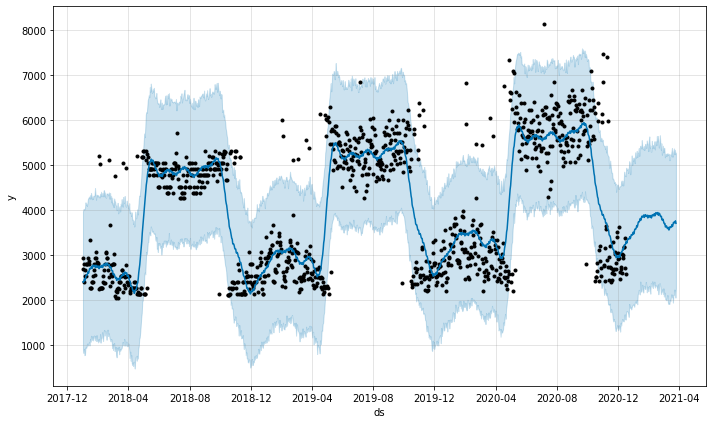

In [115]:
plot1 = m.plot(forecast)

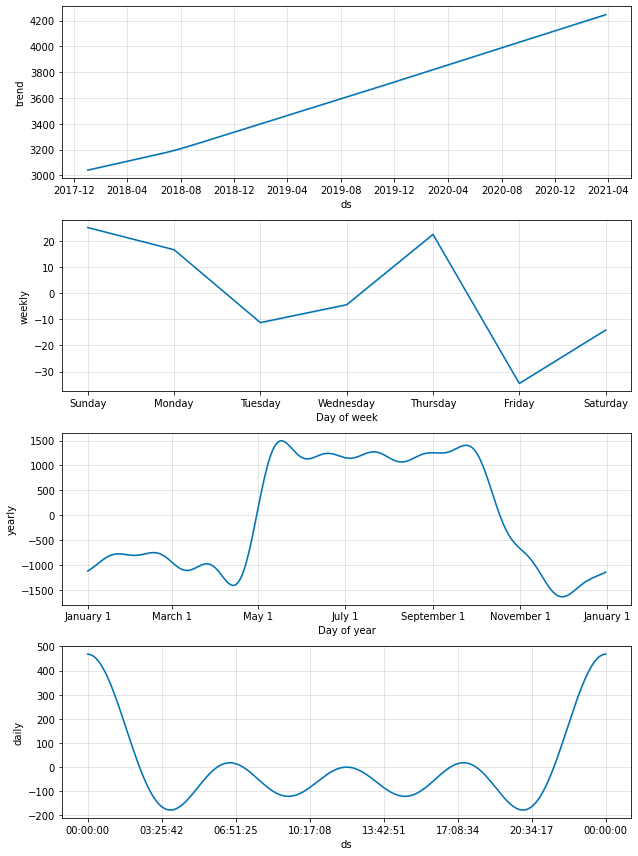

In [116]:
plot2 = m.plot_components(forecast)